# Example 2.5: Pullout from rigid matrix
## BC1 and no free length
This example shows the analytically solved model - the simplest possible configuration 

In [1]:
import sympy as sp
import numpy as np
from IPython.display import display
from sympy.plotting import plot as splot, plot3d as splot3d
sp.init_printing()

## Variables involved in the boundary value problem
#### Geometrical parameters
-  $A_\mathrm{f}$ | Cross section area modulus of the reinforcement
-  $p$: Perimeter of the reinforcement
-  $L_\mathrm{f}$: Free length of the pulled-out bar

#### Coordinate variable
-  $x$: Longitudinal coordinate

#### Material parameters
-  $E_\mathrm{f}$: Young's modulus of the reinforcement
-  $\tau$: Frictional bond stress

#### Control parameter
-  $P, w$: Pullout force, pullout displacement

#### State parameter
-  $a$: Length of the debonded zone

#### Integration constants
-  $C,D$: Integration constants to be resolved through boundary and continuity conditions

In [2]:
E_f, A_f, tau, p = sp.symbols('E_f, A_f, tau, p')
C, D = sp.symbols('C, D')
P, w = sp.symbols('P, w')
x, a, b, L_b = sp.symbols('x, a, b, L_b')

## Embedded length: equilibrium, elasticity and compatibility 
In the halfspace $x \in (-\infty, 0)$ the governing equations take the folowing form:<br>
__Equilibrium__: The equilibrium equation along the free length of the bar introduces the equivalence between the normal force in the reinforcement $\sigma_\mathrm{f} A_\mathrm{f}$ and and the bond intensity within an ifinitesimal element $\mathrm{d}x$
\begin{align}
\frac{\partial \sigma_\mathrm{f}}{\partial x} &= \frac{p \tau}{A_\mathrm{f}}.
\end{align}
By integrating this equation we obtain the stress as an unknown constant
\begin{align}
\sigma_\mathrm{f}(x) &=  \frac{p \tau}{A_\mathrm{f}} x + C.
\end{align}
__Elasticity__: Assuming linear elastic behavior with the Young's modulus $E_\mathrm{f}$ we obtain the strain $\varepsilon$ as
\begin{align}
\varepsilon_\mathrm{f}(x) = \frac{1}{E_\mathrm{f}} \left(\frac{p \tau}{A_\mathrm{f}} x + C \right).
\end{align}
__Kinematics__: The displacement of the bar within the free length is obtained as an integral
\begin{align}
u_\mathrm{f}(x) = 
\frac{p \tau x^{2}}{2 A_\mathrm{f} E_\mathrm{f}} + \frac{C x}{E_{\mathrm{f}}} + D 
\end{align}

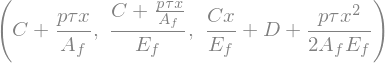

In [3]:
d_sig_f = p * tau / A_f
sig_f = sp.integrate(d_sig_f, x) + C
eps_f = sig_f / E_f
u_f = sp.integrate(eps_f, x) + D
sig_f, eps_f, u_f # check

## Phase 1: Debonding from the loaded end

### Resolving for integration constants (step 1)
__Condition 1__: Stress in the free length must be equal to $\sigma(0) = P/A_\mathrm{f}$.<br> 

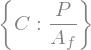

In [4]:
eq_C = {P - sig_f.subs({x:0}) * A_f}
C_subs = sp.solve(eq_C,{C})
C_subs # display the result

### Resolving for integration constants (step 2)
The solution for the integration constant $D$ requires a second thought. Can we say something about how does the displacement approach zero within the embedded length? 

__Condition 2__: We can postulate, that at some unkonwn distance $a$, the slip between the reinforcement and the matrix will be zero, i.e. $u_\mathrm{f}(a) = 0$.

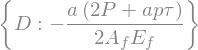

In [5]:
eqns_D = {u_f.subs(C_subs).subs({x:a})}
D_subs = sp.solve(eqns_D,{D})
D_subs

However, this postulate does not solve the problem. This additional condition has introduced an additional uknown parameter $a$ so that the problem is still not solvable and another boundary or continuity condition needs to be found.

__Condition 3__: We futher postulate, that also the strain $\varepsilon$ vanishes at the same distance $a$ as displacement reaches zero. i.e. $\varepsilon_\mathrm{f}(a) = 0$.

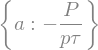

In [6]:
eqns_a = {eps_f.subs(C_subs).subs(D_subs).subs({x:a})}
a_subs = sp.solve(eqns_a,{a})
a_subs

With the known values of integration parameters we can resolve the sought displacement fields and plot it 

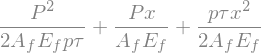

In [7]:
u_f_x1 = u_f.subs(C_subs).subs(D_subs).subs(a_subs)
u_f_x1

Substitute for all the material and geometry parameters and the load P the value 1 and plot the curve

Using the Heaviside step function $\theta(x)$ we can conveniently obtain a single function covering the domain of $x$ piece by piece.
\begin{align}
  u_\mathrm{fa} & = \left\{
  \begin{array}{ll}
  u_\mathrm{f}(x) & \iff x < 0 \land x > a, \; \mathrm{where} \; a = -\frac{P}{p\tau}, \\
  0      & \mathrm{otherwise}
  \end{array}
  \right.
\end{align}
Using the Heaviside function, we can write this in a more compact way as folows
\begin{align}
  u_\mathrm{fa} & = u_\mathrm{f} \, \theta(-x) \, \theta(x - a)
\end{align}

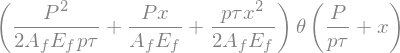

In [8]:
u_fa_x = u_f_x1 * sp.Heaviside(x-a_subs[a])
u_fa_x

In [9]:
eps_fa_x = sp.diff(u_fa_x,x)
sig_fa_x = 1 / E_f * eps_fa_x

## Differential equation solved
### Check the results for selected model parameters

In [10]:
ds_ = 1
L_b_ = -2*ds_
tau_ = 30.
p_ = 3.14 * ds_
A_f_ = (ds_/2)**2 * 3.14
E_f_ = 210000 # [MPa] 
data_f = dict(L_b=L_b_, p = p_, E_f = E_f_, A_f = A_f_, tau = tau_)
ds_, L_b_, p_, A_f_, E_f_

In [11]:
u_fa_x_data = u_fa_x.subs(data_f)
eps_fa_x_data = eps_fa_x.subs(data_f)
sig_fa_x_data = sig_fa_x.subs(data_f)

### Plot the fields $u$, $\varepsilon$, $\sigma$ for increasing load levels 

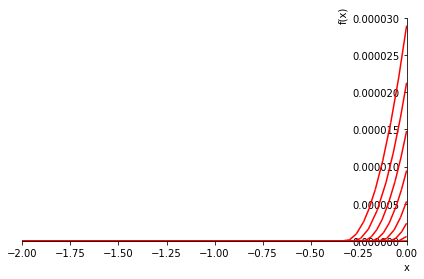

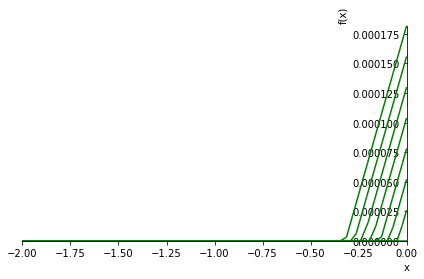

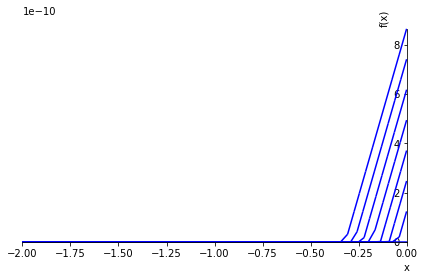

In [12]:
P_levels = np.linspace(0,30,8)
u_f_list = [u_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,L_b_,0)]
splot(*u_f_list, line_color='red')
eps_f_list = [eps_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,L_b_,0)]
splot(*eps_f_list, line_color='green')
sig_f_list = [sig_fa_x_data.subs({P: Pl}) for Pl in P_levels] + [(x,L_b_,0)]
splot(*sig_f_list, line_color='blue')

## Relate the slip at the loaded end with to the load

In [13]:
P_pull1 = sp.solve(u_fa_x.subs({x:0})-w, P)[0]
sp.simplify(P_pull1)

In [14]:
PW_pull1 = P_pull1.subs(data_f)
PW_pull1

### Plot the pullout curve
Note that this curve describes the pullout from an infinitely long bond zone

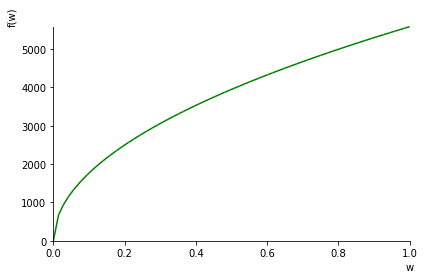

In [15]:
splot(PW_pull1, (w,0,1), line_color='green')

## Introduce finite embedded length
Find the value of load at which the debonded zone $a$ reaches the finite length of the specimen defined by the position $L_b$
\begin{align}
L_\mathrm{b} = a
\end{align}

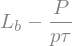

In [16]:
L_b_condition = a_subs[a] + L_b
L_b_condition # must equal to zero

When the debonded zone reached the end $L_b$, the maximum force of the pullout  $P_\max$ specimen has been attained, i.e.

In [17]:
P_max = -sp.solve(L_b_condition, P)[0]
P_max

Take the original pullout curve, set it equal to $P_\max$ and resolve for the pullout displacement $w$
\begin{align}
P(w) = P_\max \implies w
\end{align}

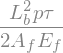

In [18]:
w_argmax = sp.solve(P_max + P_pull1, w)[0]
w_argmax

## Phase 2: pullout of the fiber
Once the debonded zone reached the end of bond length, the pullout of the fiber starts. This leads to the shortening of the bond length and reduction of the effective contact area between the fiber and matrix. Let us denote the deminishing length of the fiber $b \in (L_\mathrm{b}, 0)$. This parameter plays a similar role as $a$ in Phase 1 but it is associated with different kinematic conditions. Let us show the three steps how to resolve the integration constants in this case.

__Condition 1__: Solve the differential equation of the slip displacement for the second phase by introducing different boundary conditions. The first condition applied in Phase 1 introduces equalibrium at the loaded end.
\begin{align}
P = \sigma(0)
\end{align}
This condition is valid also in Phase 2 so that we can use `C_subs` further on.

__Condition 2__: The second condition introduces the kinematic requiement that at the unloaded end of the pulled out fiber, the stress and strain are zero, i.e. $\varepsilon(b) = 0$. This condition directly delivers the value the effective bond length $b$

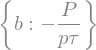

In [19]:
b_subs = sp.solve({eps_f.subs(C_subs).subs({x:b})},{b})
b_subs

__Condition 3__: Finally, the displacement at the end of the pulled out fiber that is representing the slip at the unloaded end $b$ must be equal to the distance from the end of the bond zone $L_\mathrm{b}$, i.e. 
\begin{align}
u_\mathrm{f}(b) = b - L_b
\end{align}
This condition delivers the integration constant $D$:

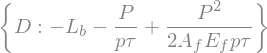

In [20]:
u_f_b = u_f.subs(C_subs).subs({x:b}) + L_b - b
Db_subs = sp.solve({u_f_b.subs(C_subs).subs(b_subs)},{D})
Db_subs

__Displacement field of the second phase__: 
By substituting all parameters we obtain the solution in the form

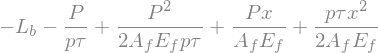

In [21]:
u_f_x2 = u_f.subs(C_subs).subs(b_subs).subs(Db_subs)
u_f_x2

To cover the whole bond zone correctly, let us again use the Heaviside function to distinguish the part of effective bond and the part that is stress-free. This is done by prescribing that in the range $x \in (L_\mathrm{b}, b)$ the slip remains constant. Such an assumption automatically results in zero strain and stress in this pulled out region.

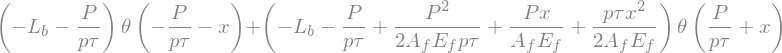

In [32]:
u_fb_x_ = u_f_x2 * sp.Heaviside(x-b) \
       + u_f_x2.subs({x:b}) * sp.Heaviside(b-x)
u_fb_x = u_fb_x_.subs(b_subs)
u_fb_x

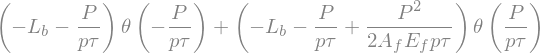

In [34]:
u_fb_x.subs(x,0)

## Verify the obtained result 
Given the parameters specified above, let us plot the displacement field and check the its plausibility.

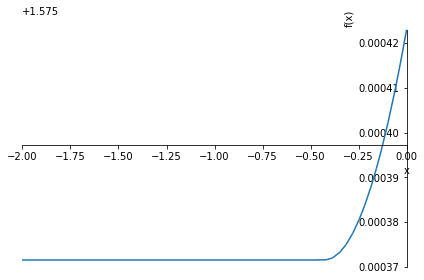

In [23]:
splot(u_fb_x.subs(data_f).subs({P:40}), (x,L_b_,0) )

### Pullout curve
To obtain the pullout curve for the second phase, solve the euqation
\begin{align}
w = u_\mathrm{f}(0;P) \implies P(w)
\end{align}

In [24]:
P_pull2 = sp.solve(u_fb_x.subs({x:0})-w, P)[0]
sp.simplify(P_pull2)

### Final pullout displacement
To cut plot the pullout curve at the zero final stress resolve the equation 
\begin{align}
P(w) = 0
\end[align}

In [25]:
sp.solve({P_pull2},{w})

## Pull out with Phase 1 and Phase 2

In [26]:
P_pull_Lb = (sp.Heaviside(w_argmax - w) * P_pull1
             + sp.Heaviside(w - w_argmax) * P_pull2)

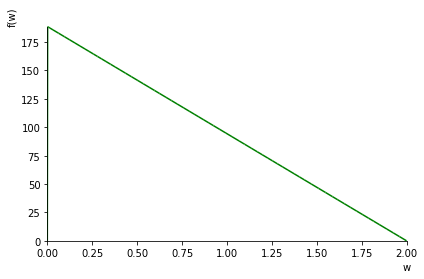

In [27]:
splot(P_pull_Lb.subs(data_f), (w,0,-L_b_), line_color='green')

In [28]:
d_f_paper = 0.76
tau_paper = 4.69
E_f_paper = 210000
A_f_paper = np.pi * (d_f_paper/2)**2
p_paper = np.pi * d_f_paper
data_paper = {'A_f': A_f_paper, 
              'E_f': E_f_paper, 
              'p': p_paper, 
              'tau': tau_paper}

In [29]:
L_b_paper = [50]
colors = ['red', 'green', 'orange']

0.0367324561403509


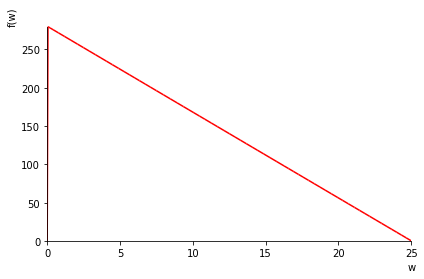

In [30]:
p_plots = []
for l_, c_ in zip( L_b_paper, colors):
    L_b_f = l_ / 2
    w_1 = w_argmax.subs(data_paper).subs({L_b: - L_b_f})
    print(w_1)
    p_pull_data = P_pull_Lb.subs(data_paper).subs({L_b : -L_b_f})
    pl = splot(p_pull_data, (w,0,L_b_f), line_color=c_)
    p_plots.append(pl)

In [31]:
p_plots[0].extend(p_plots[1])
p_plots[0].extend(p_plots[2])
p_plots[0].show()

IndexError: list index out of range